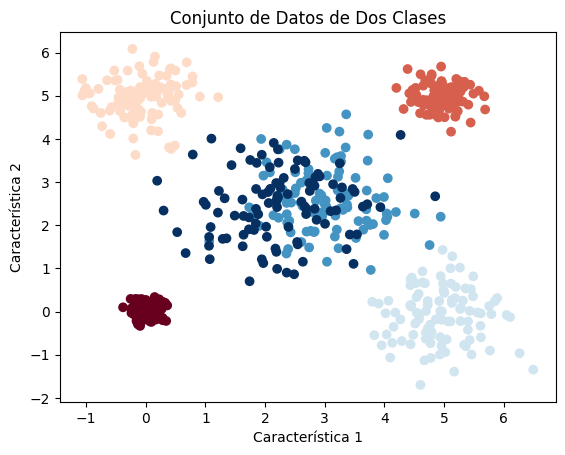

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.linear_model import LogisticRegression
# Generación de datos para dos clases

np.random.seed(0)
n_samples = 100 # número de muestras por clase
class_1 = 0.15 * np.random.randn(n_samples, 2) 
class_2 = 0.30 * np.random.randn(n_samples, 2) + np.array([5, 5]) 
class_3 = 0.45 * np.random.randn(n_samples, 2) + np.array([0, 5]) 
class_4 =0.60 * np.random.randn(n_samples, 2) + np.array([5, 0]) 
class_5 =0.75 * np.random.randn(n_samples, 2) + np.array([3, 2.5]) 
class_6 =0.90 * np.random.randn(n_samples, 2) + np.array([2, 2.5]) 

X = np.vstack((class_1, class_2, class_3, class_4, class_5, class_6)) #apila verticalmente (concatenar hacia abajo) dos conjuntos de datos

y = np.hstack((np.zeros(n_samples), np.ones(n_samples), np.ones(n_samples)*2, np.ones(n_samples)*3, np.ones(n_samples)*4, np.ones(n_samples)*5))
# crea un vector de ceros con una longitud igual a
#n_samples para la clase 0 y clas 1 respectivamente
# Visualización de los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Conjunto de Datos de Dos Clases')
plt.show ()

In [32]:
# Paso 2: Encontrar los centros de las neuronas RBF mediante K-Means
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
centers = kmeans.cluster_centers_

In [33]:
# Paso 3: Calcular el ancho de los kernels RBF
widths = pairwise_distances_argmin_min(X, centers)[1].mean()

In [34]:
# Paso 4: Calcular las activaciones de las neuronas RBF
def rbf_kernel(x, centers, width):
  return np.exp(-0.5 * (np.linalg.norm(x[:, np.newaxis] - centers, axis=2) / width) ** 2)
# x[:, np.newaxis] es una operación que cambia la forma de la matriz de características
# Esto se hace para poder restar los centros de las neuronas centers, que tiene la forma (n_clusters, n_features)
# np. linalg-norm(x[:, np.newaxis] - centers, axis=2) calcula la norma Euclidiana
# entre cada punto de datos en x y todos los centros de las neuronas.
phi = rbf_kernel(X, centers, widths)
# Convertir phi a una matriz 2D
phi = phi. reshape(-1, n_clusters)
# convertimos la matriz phi a una matriz 2D utilizando .reshape(-1, n_clusters)

In [35]:
# Paso 5: Entrenar un modelo de clasificación en las activaciones de las neuronas RBF
rbf_model = LogisticRegression()
rbf_model. fit (phi, y)

LogisticRegression()

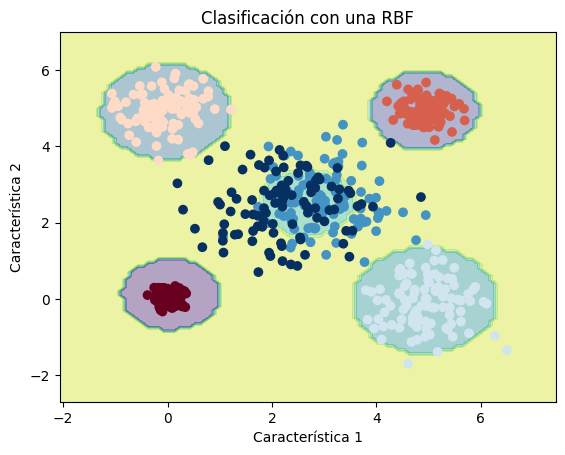

In [36]:
# Generar nuevos datos de prueba
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# se calculan como los valores mínimos y máximos en la columna 0
# (Característica 1) de los datos originales X, con un pequeño ajuste
# hacia abajo y hacia arriba respectivamente.
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np. meshgrid(np. arange(x_min, x_max, 0.1), np.arange (y_min, y_max, 0.1))
# se crean utilizando np.meshgrid para crear una malla de puntos en el espacio de características
Z = rbf_model.predict(rbf_kernel(np.c_[xx.ravel(), yy.ravel()], centers, widths))
# Se utiliza el modelo de regresión logística rbf_model previamente entrenado para
# predecir las clases de los nuevos datos generados. Para hacerlo, se calcula el kernel
# RBF para cada punto en la malla (np.c_[xx.ravel(), yy.ravel()]) utilizando la función
#rbf_kernel. Luego, se pasa esta matriz de características a rbf._model. predict para
# obtener las predicciones de clase. Las predicciones se almacenan en la variable Z.
# Visualizar la frontera de decisión
Z = Z. reshape(xx.shape)
plt. contourf(xx, yy, Z, alpha=0.4)
plt. scatter (X[:, 0], X[:, 1], c=y, cmap=plt. cm.RdBu)
plt. xlabel ('Característica 1')
plt. ylabel('Característica 2')
plt. title('Clasificación con una RBF')
plt. show()